# I - Pr√©paration de donn√©es

## 0-T√©l√©chargement de donn√©es

In [3]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

## 1- Informations sur les donn√©es

In [5]:
X = mnist.keys()
print("Cl√©s disponibles dans le dataset MNIST:")
print(list(X))

Cl√©s disponibles dans le dataset MNIST:
['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [6]:
import numpy as np

# a. Stocker les donn√©es dans la variable X
X = mnist.data
print("a. Variable X cr√©√©e avec les donn√©es")

# b. Afficher la taille des donn√©es (nombre de features et taille de chaque feature)
print(f"b. Taille des donn√©es X: {X.shape}")
print(f"   - Nombre d'√©chantillons: {X.shape[0]}")
print(f"   - Nombre de features par √©chantillon: {X.shape[1]}")

# c. Stocker les classes dans la variable Y
Y = mnist.target
print("\nc. Variable Y cr√©√©e avec les classes")

# d. Afficher la taille des labels/classes
print(f"d. Taille des labels Y: {Y.shape}")
print(f"   - Nombre total de labels: {Y.shape[0]}")

# e. Afficher les diff√©rentes classes de la base de donn√©es
classes_uniques = np.unique(Y)
print(f"\ne. Classes uniques dans la base de donn√©es: {classes_uniques}")
print(f"   - Nombre de classes diff√©rentes: {len(classes_uniques)}")

# f. Description d√©taill√©e de la base de donn√©es
print("\nf. Description d√©taill√©e de la base de donn√©es:")
print(mnist.DESCR)

a. Variable X cr√©√©e avec les donn√©es
b. Taille des donn√©es X: (70000, 784)
   - Nombre d'√©chantillons: 70000
   - Nombre de features par √©chantillon: 784

c. Variable Y cr√©√©e avec les classes
d. Taille des labels Y: (70000,)
   - Nombre total de labels: 70000

e. Classes uniques dans la base de donn√©es: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
   - Nombre de classes diff√©rentes: 10

f. Description d√©taill√©e de la base de donn√©es:
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want 

=== Analyse de la premi√®re instance de MNIST ===

a. Affichage de la premi√®re instance:
   i. Premi√®re instance extraite avec X.values[0]
      Forme originale: (784,)
   ii. Image redimensionn√©e en 28x28: (28, 28)


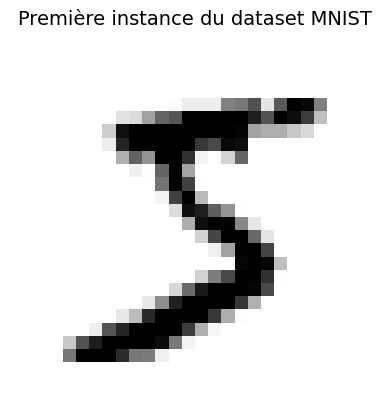

   iii. Image affich√©e en niveau de gris
        Valeurs min/max des pixels: 0.0 √† 255.0

b. Analyse de la premi√®re instance:
   - Classe de la premi√®re instance: 5
   - Type de la classe: <class 'str'>
   - Type de l'instance (donn√©es): <class 'numpy.ndarray'>

=== Conclusion ===
La premi√®re image du dataset MNIST repr√©sente le chiffre: 5


In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print("=== Analyse de la premi√®re instance de MNIST ===\n")

# a. Affichage de la premi√®re instance de la base de donn√©es
print("a. Affichage de la premi√®re instance:")

# i. Utiliser l'attribut "values" du dictionnaire X
premiere_instance = X.values[0]
print(f"   i. Premi√®re instance extraite avec X.values[0]")
print(f"      Forme originale: {premiere_instance.shape}")

# ii. Redimensionner via la fonction "reshape" de numpy en taille 28,28
image_2d = premiere_instance.reshape(28, 28)
print(f"   ii. Image redimensionn√©e en 28x28: {image_2d.shape}")

# iii. Utiliser imshow avec cmap=mpl.cm.binary pour affichage en niveau de gris
plt.figure()
plt.imshow(image_2d, cmap=mpl.cm.binary)
plt.title("Premi√®re instance du dataset MNIST", fontsize=14)
plt.axis('off')  # Supprimer les axes pour une meilleure visualisation
plt.show()

print(f"   iii. Image affich√©e en niveau de gris")
print(f"        Valeurs min/max des pixels: {premiere_instance.min():.1f} √† {premiere_instance.max():.1f}")

# b. Afficher la classe et le type de la premi√®re instance
print(f"\nb. Analyse de la premi√®re instance:")
classe_premiere = Y.iloc[0]  # Utiliser iloc pour pandas Series
print(f"   - Classe de la premi√®re instance: {classe_premiere}")
print(f"   - Type de la classe: {type(classe_premiere)}")
print(f"   - Type de l'instance (donn√©es): {type(premiere_instance)}")

print(f"\n=== Conclusion ===")
print(f"La premi√®re image du dataset MNIST repr√©sente le chiffre: {classe_premiere}")

In [8]:
print("=== Conversion des labels en valeurs num√©riques ===\n")

# Afficher le type actuel des labels
print(f"Type actuel de Y: {type(Y)}")
print(f"Type des √©l√©ments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (avant casting): {list(Y.head())}")

# Appliquer le casting sur les labels
Y = Y.astype(np.uint8)

# V√©rifier le r√©sultat du casting
print(f"\nApr√®s casting:")
print(f"Type de Y: {type(Y)}")
print(f"Type des √©l√©ments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (apr√®s casting): {list(Y.head())}")

# V√©rifier que la classe de la premi√®re instance est maintenant num√©rique
classe_premiere_numerique = Y.iloc[0]
print(f"\nClasse de la premi√®re instance (num√©rique): {classe_premiere_numerique}")
print(f"Type de la classe: {type(classe_premiere_numerique)}")
print(f"\n=== Conclusion ===")
print("Les labels ont √©t√© convertis en valeurs num√©riques avec succ√®s.")

=== Conversion des labels en valeurs num√©riques ===

Type actuel de Y: <class 'pandas.core.series.Series'>
Type des √©l√©ments de Y: <class 'str'>
Premiers labels (avant casting): ['5', '0', '4', '1', '9']

Apr√®s casting:
Type de Y: <class 'pandas.core.series.Series'>
Type des √©l√©ments de Y: <class 'numpy.uint8'>
Premiers labels (apr√®s casting): [5, 0, 4, 1, 9]

Classe de la premi√®re instance (num√©rique): 5
Type de la classe: <class 'numpy.uint8'>

=== Conclusion ===
Les labels ont √©t√© convertis en valeurs num√©riques avec succ√®s.


## 2- R√©partition des donn√©es

In [9]:
print("=== R√©partition des donn√©es MNIST ===\n")

# V√©rification de la taille totale des donn√©es
print(f"Taille totale des donn√©es: {X.shape[0]} √©chantillons")
print(f"Taille totale des labels: {Y.shape[0]} √©chantillons")

# R√©partition des donn√©es en une seule ligne (indexing sur ndarrays)
# a. Les 60 000 premi√®res images composeront la base d'apprentissage
# b. Le reste des images constitue la base de test
X_train, X_test = X.iloc[:60000], X.iloc[60000:]
Y_train, Y_test = Y.iloc[:60000], Y.iloc[60000:]

print(f"\n=== R√©sultats de la r√©partition ===")
print(f"Donn√©es d'apprentissage:")
print(f"  - X_train: {X_train.shape} √©chantillons")
print(f"  - Y_train: {Y_train.shape} labels")

print(f"\nDonn√©es de test:")
print(f"  - X_test: {X_test.shape} √©chantillons") 
print(f"  - Y_test: {Y_test.shape} labels")

print(f"\n=== V√©rification ===")
print(f"Total apprentissage + test: {X_train.shape[0] + X_test.shape[0]} √©chantillons")
print(f"Coh√©rent avec le total original: {X_train.shape[0] + X_test.shape[0] == X.shape[0]}")

print(f"\nR√©partition termin√©e!")
print(f"60 000 √©chantillons pour l'apprentissage")
print(f"{X_test.shape[0]} √©chantillons pour le test")

=== R√©partition des donn√©es MNIST ===

Taille totale des donn√©es: 70000 √©chantillons
Taille totale des labels: 70000 √©chantillons

=== R√©sultats de la r√©partition ===
Donn√©es d'apprentissage:
  - X_train: (60000, 784) √©chantillons
  - Y_train: (60000,) labels

Donn√©es de test:
  - X_test: (10000, 784) √©chantillons
  - Y_test: (10000,) labels

=== V√©rification ===
Total apprentissage + test: 70000 √©chantillons
Coh√©rent avec le total original: True

R√©partition termin√©e!
60 000 √©chantillons pour l'apprentissage
10000 √©chantillons pour le test


# II- Apprentissage d'un classifieur binaire

## 2 - Apprentissage des donn√©es

In [10]:
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

print(f"\n=== R√©sultats de la r√©partition ===")
print(f"\ny_train_5: {y_train_5}")
print(f"\ny_test_5: {y_test_5}")


=== R√©sultats de la r√©partition ===

y_train_5: 0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

y_test_5: 60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool


In [11]:
from sklearn.linear_model import SGDClassifier

# a. Cr√©ation d'un objet SGDClassifier
sgd_classifier = SGDClassifier()

# b. Application de la m√©thode fit avec les donn√©es de la question 14 (classification binaire)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier()

In [12]:
print("=== Pr√©diction de la premi√®re instance avec le mod√®le SGD ===\n")

# Extraire la premi√®re instance (celle de la question 8)
premiere_instance = X.iloc[0:1]  # Utiliser [0:1] pour garder la forme 2D n√©cessaire
print(f"Forme de la premi√®re instance: {premiere_instance.shape}")

# Pr√©dire avec le mod√®le SGD entra√Æn√©
prediction = sgd_classifier.predict(premiere_instance)
print(f"\nPr√©diction du mod√®le:")
print(f"- R√©sultat: {prediction[0]}")
print(f"- Type: {type(prediction[0])}")

# V√©rification avec la vraie classe
vraie_classe = Y.iloc[0]
est_vraiment_5 = (vraie_classe == 5)

print(f"\nComparaison avec la r√©alit√©:")
print(f"- Vraie classe de la premi√®re instance: {vraie_classe}")
print(f"- Est-ce vraiment un '5'?: {est_vraiment_5}")
print(f"- Pr√©diction du mod√®le: {prediction[0]}")

# R√©sultat de la pr√©diction
if prediction[0]:
    if est_vraiment_5:
        print(f"\nLe mod√®le pr√©dit: 'C'est un chiffre 5'")
    else :
        print("\nLe mod√®le pr√©dit: 'C'est un chiffre 5' (ERREUR)")
else:
    if est_vraiment_5:
        print(f"\nLe mod√®le pr√©dit: 'Ce n'est PAS un chiffre 5' (ERREUR)")
    else:
        print("\nLe mod√®le pr√©dit: 'Ce n'est PAS un chiffre 5'")

print(f"\n=== Conclusion ===")
print(f"Pr√©diction: {'True' if prediction[0] else 'False'}")
print(f"Exactitude: {'Correct' if prediction[0] == est_vraiment_5 else 'Incorrect'}")

=== Pr√©diction de la premi√®re instance avec le mod√®le SGD ===

Forme de la premi√®re instance: (1, 784)

Pr√©diction du mod√®le:
- R√©sultat: True
- Type: <class 'numpy.bool'>

Comparaison avec la r√©alit√©:
- Vraie classe de la premi√®re instance: 5
- Est-ce vraiment un '5'?: True
- Pr√©diction du mod√®le: True

Le mod√®le pr√©dit: 'C'est un chiffre 5'

=== Conclusion ===
Pr√©diction: True
Exactitude: Correct


### 2-1- Taux de classification

In [13]:
from sklearn.model_selection import cross_val_score

# Opter pour la valeur accuracy pour l'argument scoring
# a. Afficher le taux de classification (accuracy) de chaque fold
scores = cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(f"Taux de classification (accuracy) pour chaque fold: {scores}")
# b. Afficher la moyenne du taux de classification
print(f"Moyenne du taux de classification: {scores.mean():.4f}")

Taux de classification (accuracy) pour chaque fold: [0.9663 0.9547 0.9473]
Moyenne du taux de classification: 0.9561


In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, data, labels):
        pass

    def predict(self, data):
        '''Prend en argument les donn√©es et retourne une 
structure de donn√©es ayant la taille des donn√©es et qui contient que la 
valeur False (= non-5)'''
        return np.zeros((data.shape[0],), dtype=bool)
    
# c. Cr√©ez un objet de la classe Never5Classifier
never_5_classifier = Never5Classifier()

# d. Testez le classifieur Never5Classifier en utilisant une validation crois√©e de type 3-fold cross-validation.
# i. Afficher le taux de classification (accuracy) de chaque fold
scores_never5 = cross_val_score(never_5_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(f"\nTaux de classification (accuracy) pour chaque fold avec Never5Classifier: {scores_never5}")
# ii. Afficher la moyenne du taux de classification
print(f"Moyenne du taux de classification avec Never5Classifier: {scores_never5.mean():.4f}")


Taux de classification (accuracy) pour chaque fold avec Never5Classifier: [0.91125 0.90855 0.90915]
Moyenne du taux de classification avec Never5Classifier: 0.9096


### 2-2- Matrice de confusion

In [15]:
from sklearn.model_selection import cross_val_predict

print("=== √âvaluation du classifieur SGD avec cross_val_predict ===\n")

# Utiliser cross_val_predict pour obtenir les classes pr√©dites
# Cette fonction retourne les pr√©dictions pour chaque √©chantillon lors de la validation crois√©e 3-fold
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

print(f"Type des pr√©dictions: {type(y_train_pred)}")
print(f"Forme des pr√©dictions: {y_train_pred.shape}")
print(f"Type des √©l√©ments: {type(y_train_pred[0])}")

# Afficher quelques exemples de pr√©dictions
print(f"\nPremi√®res 20 pr√©dictions: {y_train_pred[:20]}")
print(f"Derni√®res 20 pr√©dictions: {y_train_pred[-20:]}")

# Compter les pr√©dictions True et False
nb_true = np.sum(y_train_pred)
nb_false = len(y_train_pred) - nb_true

print(f"\n=== Statistiques des pr√©dictions ===")
print(f"Nombre total de pr√©dictions: {len(y_train_pred)}")
print(f"Pr√©dictions 'True' (chiffre 5): {nb_true}")
print(f"Pr√©dictions 'False' (non-5): {nb_false}")
print(f"Pourcentage de 'True': {(nb_true / len(y_train_pred) * 100):.2f}%")
print(f"Pourcentage de 'False': {(nb_false / len(y_train_pred) * 100):.2f}%")

# Comparer avec les vraies valeurs
nb_vraies_5 = np.sum(y_train_5)
print(f"\n=== Comparaison avec la r√©alit√© ===")
print(f"Vraies instances de '5' dans l'entra√Ænement: {nb_vraies_5}")
print(f"Vraies instances de 'non-5' dans l'entra√Ænement: {len(y_train_5) - nb_vraies_5}")

print(f"\n=== R√©sultats de cross_val_predict ===")
print("Les pr√©dictions ont √©t√© obtenues pour tous les √©chantillons d'entra√Ænement")
print("Chaque √©chantillon a √©t√© pr√©dit exactement une fois lors de la validation crois√©e")

=== √âvaluation du classifieur SGD avec cross_val_predict ===

Type des pr√©dictions: <class 'numpy.ndarray'>
Forme des pr√©dictions: (60000,)
Type des √©l√©ments: <class 'numpy.bool'>

Premi√®res 20 pr√©dictions: [ True False False False False False False False False False False  True
 False False False False False False False False]
Derni√®res 20 pr√©dictions: [False False False False False False False False False False False False
 False  True False False False  True False False]

=== Statistiques des pr√©dictions ===
Nombre total de pr√©dictions: 60000
Pr√©dictions 'True' (chiffre 5): 4888
Pr√©dictions 'False' (non-5): 55112
Pourcentage de 'True': 8.15%
Pourcentage de 'False': 91.85%

=== Comparaison avec la r√©alit√© ===
Vraies instances de '5' dans l'entra√Ænement: 5421
Vraies instances de 'non-5' dans l'entra√Ænement: 54579

=== R√©sultats de cross_val_predict ===
Les pr√©dictions ont √©t√© obtenues pour tous les √©chantillons d'entra√Ænement
Chaque √©chantillon a √©t√© pr√©dit 

=== Matrice de confusion du classifieur SGD ===

Matrice de confusion (valeurs absolues):
[[53707   872]
 [ 1405  4016]]

Matrice de confusion normalis√©e:
[[0.98402316 0.01597684]
 [0.25917727 0.74082273]]


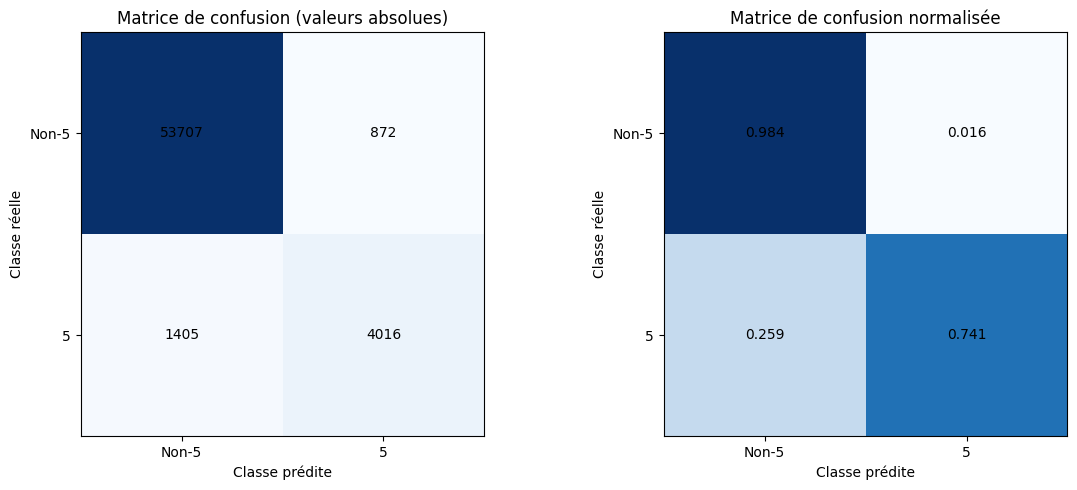


=== Interpr√©tation de la matrice de confusion ===

Valeurs de la matrice (absolues):
‚Ä¢ Vrais N√©gatifs (TN): 53707 - Correctement class√©s comme 'Non-5'
‚Ä¢ Faux Positifs (FP): 872 - Incorrectement class√©s comme '5' (Erreur Type I)
‚Ä¢ Faux N√©gatifs (FN): 1405 - Incorrectement class√©s comme 'Non-5' (Erreur Type II)
‚Ä¢ Vrais Positifs (TP): 4016 - Correctement class√©s comme '5'

Pourcentages (normalis√©s):
‚Ä¢ Sp√©cificit√© (TN rate): 0.984 - 98.4% des 'Non-5' bien identifi√©s
‚Ä¢ Taux FP (FP rate): 0.016 - 1.6% des 'Non-5' mal class√©s comme '5'
‚Ä¢ Taux FN (FN rate): 0.259 - 25.9% des '5' mal class√©s comme 'Non-5'
‚Ä¢ Sensibilit√© (TP rate): 0.741 - 74.1% des '5' bien identifi√©s


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print("=== Matrice de confusion du classifieur SGD ===\n")

# Calculer la matrice de confusion normale
cm = confusion_matrix(y_train_5, y_train_pred)
print("Matrice de confusion (valeurs absolues):")
print(cm)

# Calculer la matrice de confusion normalis√©e
cm_normalized = confusion_matrix(y_train_5, y_train_pred, normalize='true')
print("\nMatrice de confusion normalis√©e:")
print(cm_normalized)

# Visualisation des matrices de confusion avec matplotlib uniquement
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matrice de confusion absolue
im1 = axes[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Matrice de confusion (valeurs absolues)')
axes[0].set_xlabel('Classe pr√©dite')
axes[0].set_ylabel('Classe r√©elle')

# Ajouter les annotations manuellement
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0].text(j, i, format(cm[i, j], 'd'), 
                    ha="center", va="center", color="black")

# Ajouter les labels des axes
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Non-5', '5'])
axes[0].set_yticklabels(['Non-5', '5'])

# Matrice de confusion normalis√©e
im2 = axes[1].imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Matrice de confusion normalis√©e')
axes[1].set_xlabel('Classe pr√©dite')
axes[1].set_ylabel('Classe r√©elle')

# Ajouter les annotations pour la matrice normalis√©e
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        axes[1].text(j, i, format(cm_normalized[i, j], '.3f'), 
                    ha="center", va="center", color="black")

# Ajouter les labels des axes
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Non-5', '5'])
axes[1].set_yticklabels(['Non-5', '5'])

plt.tight_layout()
plt.show()

# Interpr√©tation d√©taill√©e de la matrice de confusion
print("\n=== Interpr√©tation de la matrice de confusion ===")
tn, fp, fn, tp = cm.ravel()

print(f"\nValeurs de la matrice (absolues):")
print(f"‚Ä¢ Vrais N√©gatifs (TN): {tn} - Correctement class√©s comme 'Non-5'")
print(f"‚Ä¢ Faux Positifs (FP): {fp} - Incorrectement class√©s comme '5' (Erreur Type I)")
print(f"‚Ä¢ Faux N√©gatifs (FN): {fn} - Incorrectement class√©s comme 'Non-5' (Erreur Type II)")
print(f"‚Ä¢ Vrais Positifs (TP): {tp} - Correctement class√©s comme '5'")

print(f"\nPourcentages (normalis√©s):")
print(f"‚Ä¢ Sp√©cificit√© (TN rate): {cm_normalized[0,0]:.3f} - {cm_normalized[0,0]*100:.1f}% des 'Non-5' bien identifi√©s")
print(f"‚Ä¢ Taux FP (FP rate): {cm_normalized[0,1]:.3f} - {cm_normalized[0,1]*100:.1f}% des 'Non-5' mal class√©s comme '5'")
print(f"‚Ä¢ Taux FN (FN rate): {cm_normalized[1,0]:.3f} - {cm_normalized[1,0]*100:.1f}% des '5' mal class√©s comme 'Non-5'")
print(f"‚Ä¢ Sensibilit√© (TP rate): {cm_normalized[1,1]:.3f} - {cm_normalized[1,1]*100:.1f}% des '5' bien identifi√©s")


### 2-3- Pr√©cision et rappel

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("=== Calcul des m√©triques de performance avec sklearn.metrics ===\n")

# Calculer la pr√©cision
precision = precision_score(y_train_5, y_train_pred)
print(f"Pr√©cision (Precision): {precision:.4f}")

# Calculer le rappel
recall = recall_score(y_train_5, y_train_pred)
print(f"Rappel (Recall): {recall:.4f}")

# Calculer le score F1
f1 = f1_score(y_train_5, y_train_pred)
print(f"Score F1: {f1:.4f}")

print(f"\n=== Interpr√©tation des r√©sultats ===")

print(f"\n1. PR√âCISION = {precision:.4f} ({precision*100:.2f}%)")
print(f"   ‚Ä¢ Sur toutes les images que le mod√®le a class√©es comme '5',")
print(f"     {precision*100:.2f}% sont r√©ellement des '5'")
print(f"   ‚Ä¢ {(1-precision)*100:.2f}% sont des faux positifs (erreurs)")

print(f"\n2. RAPPEL = {recall:.4f} ({recall*100:.2f}%)")
print(f"   ‚Ä¢ Sur toutes les vraies images de '5' dans la base,")
print(f"     le mod√®le en a d√©tect√© {recall*100:.2f}%")
print(f"   ‚Ä¢ Il a manqu√© {(1-recall)*100:.2f}% des vrais '5' (faux n√©gatifs)")

print(f"\n3. SCORE F1 = {f1:.4f} ({f1*100:.2f}%)")
print(f"   ‚Ä¢ Moyenne harmonique entre pr√©cision et rappel")
print(f"   ‚Ä¢ Mesure √©quilibr√©e des performances globales")

print(f"\n=== Analyse comparative ===")
if precision > recall:
    print(f"‚úì Pr√©cision > Rappel : Le mod√®le est plut√¥t conservateur")
    print(f"  ‚Üí Il √©vite les faux positifs mais manque quelques vrais '5'")
elif recall > precision:
    print(f"‚úì Rappel > Pr√©cision : Le mod√®le est plut√¥t lib√©ral")
    print(f"  ‚Üí Il d√©tecte bien les '5' mais fait quelques erreurs en trop")
else:
    print(f"‚úì Pr√©cision ‚âà Rappel : Mod√®le √©quilibr√©")

# √âvaluation globale
if f1 >= 0.8:
    print(f"\nüéØ CONCLUSION: Performances EXCELLENTES (F1 ‚â• 80%)")
elif f1 >= 0.6:
    print(f"\n‚úÖ CONCLUSION: Performances BONNES (F1 ‚â• 60%)")
elif f1 >= 0.4:
    print(f"\n‚ö†Ô∏è  CONCLUSION: Performances MOYENNES (F1 ‚â• 40%)")
else:
    print(f"\n‚ùå CONCLUSION: Performances FAIBLES (F1 < 40%)")

=== Calcul des m√©triques de performance avec sklearn.metrics ===

Pr√©cision (Precision): 0.8216
Rappel (Recall): 0.7408
Score F1: 0.7791

=== Interpr√©tation des r√©sultats ===

1. PR√âCISION = 0.8216 (82.16%)
   ‚Ä¢ Sur toutes les images que le mod√®le a class√©es comme '5',
     82.16% sont r√©ellement des '5'
   ‚Ä¢ 17.84% sont des faux positifs (erreurs)

2. RAPPEL = 0.7408 (74.08%)
   ‚Ä¢ Sur toutes les vraies images de '5' dans la base,
     le mod√®le en a d√©tect√© 74.08%
   ‚Ä¢ Il a manqu√© 25.92% des vrais '5' (faux n√©gatifs)

3. SCORE F1 = 0.7791 (77.91%)
   ‚Ä¢ Moyenne harmonique entre pr√©cision et rappel
   ‚Ä¢ Mesure √©quilibr√©e des performances globales

=== Analyse comparative ===
‚úì Pr√©cision > Rappel : Le mod√®le est plut√¥t conservateur
  ‚Üí Il √©vite les faux positifs mais manque quelques vrais '5'

‚úÖ CONCLUSION: Performances BONNES (F1 ‚â• 60%)


In [18]:
from sklearn.model_selection import cross_val_predict
import numpy as np

print("=== Calcul des scores de d√©cision avec cross_val_predict ===\n")

# Utiliser cross_val_predict avec method='decision_function' pour obtenir les scores
# Cette fonction retourne les scores de d√©cision pour chaque √©chantillon lors de la validation crois√©e 3-fold
y_train_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method='decision_function')

print(f"Type des scores: {type(y_train_scores)}")
print(f"Forme des scores: {y_train_scores.shape}")
print(f"Type des √©l√©ments: {type(y_train_scores[0])}")

# Afficher quelques exemples de scores
print(f"\nPremiers 20 scores: {y_train_scores[:20]}")
print(f"Derniers 20 scores: {y_train_scores[-20:]}")

# Statistiques des scores
print(f"\n=== Statistiques des scores de d√©cision ===")
print(f"Nombre total de scores: {len(y_train_scores)}")
print(f"Score minimum: {y_train_scores.min():.4f}")
print(f"Score maximum: {y_train_scores.max():.4f}")
print(f"Score moyen: {y_train_scores.mean():.4f}")
print(f"√âcart-type: {y_train_scores.std():.4f}")

# Compter les scores positifs et n√©gatifs (seuil par d√©faut = 0)
scores_positifs = np.sum(y_train_scores > 0)
scores_negatifs = np.sum(y_train_scores <= 0)

print(f"\n=== R√©partition selon le seuil par d√©faut (0) ===")
print(f"Scores positifs (> 0): {scores_positifs} - Pr√©dits comme '5'")
print(f"Scores n√©gatifs (‚â§ 0): {scores_negatifs} - Pr√©dits comme 'Non-5'")
print(f"Pourcentage de scores positifs: {(scores_positifs / len(y_train_scores) * 100):.2f}%")
print(f"Pourcentage de scores n√©gatifs: {(scores_negatifs / len(y_train_scores) * 100):.2f}%")

# Comparaison avec les pr√©dictions binaires pr√©c√©dentes
predictions_binaires = (y_train_scores > 0)
coherence = np.array_equal(predictions_binaires, y_train_pred)
print(f"\n=== V√©rification de coh√©rence ===")
print(f"Les pr√©dictions binaires (score > 0) correspondent aux pr√©dictions pr√©c√©dentes: {coherence}")

print(f"\n=== Conclusion ===")
print("Les scores de d√©cision permettent de comprendre la 'confiance' du mod√®le:")
print("‚Ä¢ Plus le score est √©lev√©, plus le mod√®le est confiant que c'est un '5'")
print("‚Ä¢ Plus le score est faible (n√©gatif), plus le mod√®le est confiant que ce n'est PAS un '5'")
print("‚Ä¢ Le seuil par d√©faut de 0 s√©pare les deux classes")

=== Calcul des scores de d√©cision avec cross_val_predict ===

Type des scores: <class 'numpy.ndarray'>
Forme des scores: (60000,)
Type des √©l√©ments: <class 'numpy.float64'>

Premiers 20 scores: [  1570.17566418 -11266.93763079 -28457.89266355  -9400.90487617
 -13411.07207658  -7119.0520388  -13161.13731058 -14877.42695317
  -5888.94910448  -8502.16568734 -12006.27115937   8650.34190223
 -16421.11276676 -11362.41466113  -4801.58608721 -10690.54954908
 -21252.27299884  -6660.23653279  -2469.38329145 -16112.33338768]
Derniers 20 scores: [  1559.13121702 -18720.44055174 -12578.62139208 -30977.84259877
 -19386.23432117 -31421.49973038  -6534.74684283 -13849.12947527
 -14356.66020406 -13029.99226477 -22935.70312382 -13661.85990239
 -11052.37214415   6798.88845945 -10122.73977198 -12799.30921579
 -19321.46755397   6639.46795962  -4206.97223245 -11817.14379911]

=== Statistiques des scores de d√©cision ===
Nombre total de scores: 60000
Score minimum: -127343.3316
Score maximum: 42372.1086
S

=== Calcul des pr√©cisions, rappels et seuils avec precision_recall_curve ===

Nombre de seuils calcul√©s: 60000
Nombre de valeurs de pr√©cision: 60001
Nombre de valeurs de rappel: 60001

=== Analyse des seuils ===
Seuil minimum: -127343.3316
Seuil maximum: 42372.1086
Premiers 10 seuils: [-127343.33159183 -125499.04376437 -116925.9075483  -116569.92074788
 -114773.99668189 -112991.74414719 -110245.6390114  -110132.91808914
 -109964.99575704 -104078.5356573 ]
Derniers 10 seuils: [29048.41914716 29388.47651702 29594.09030553 29795.51686203
 30454.92470464 32688.701529   33756.59853073 34117.367574
 38896.49267814 42372.10857937]

=== Analyse des pr√©cisions ===
Pr√©cision minimum: 0.0903
Pr√©cision maximum: 1.0000
Pr√©cision moyenne: 0.2855

=== Analyse des rappels ===
Rappel minimum: 0.0000
Rappel maximum: 1.0000
Rappel moyen: 0.9214


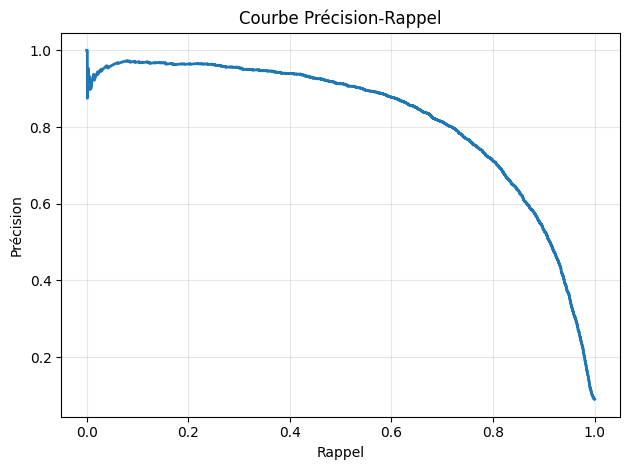


=== Analyse de points cl√©s ===
Seuil optimal (F1 max): -618.4582
  - Pr√©cision: 0.7670
  - Rappel: 0.7519
  - F1-score: 0.7594

Seuil par d√©faut (‚âà 0):
  - Pr√©cision: 0.0903
  - Rappel: 1.0000
  - F1-score: 0.1657

=== Conclusion ===
La courbe pr√©cision-rappel montre le compromis entre pr√©cision et rappel:
‚Ä¢ Seuil √©lev√© ‚Üí Pr√©cision √©lev√©e, Rappel faible (peu de faux positifs)
‚Ä¢ Seuil faible ‚Üí Pr√©cision faible, Rappel √©lev√© (peu de faux n√©gatifs)
‚Ä¢ Le seuil optimal pour F1 est: -618.4582


In [19]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

print("=== Calcul des pr√©cisions, rappels et seuils avec precision_recall_curve ===\n")

# Calculer les pr√©cisions, rappels et seuils pour chaque instance
# Utilise les scores de d√©cision calcul√©s pr√©c√©demment
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

print(f"Nombre de seuils calcul√©s: {len(thresholds)}")
print(f"Nombre de valeurs de pr√©cision: {len(precisions)}")
print(f"Nombre de valeurs de rappel: {len(recalls)}")

print(f"\n=== Analyse des seuils ===")
print(f"Seuil minimum: {thresholds.min():.4f}")
print(f"Seuil maximum: {thresholds.max():.4f}")
print(f"Premiers 10 seuils: {thresholds[:10]}")
print(f"Derniers 10 seuils: {thresholds[-10:]}")

print(f"\n=== Analyse des pr√©cisions ===")
print(f"Pr√©cision minimum: {precisions.min():.4f}")
print(f"Pr√©cision maximum: {precisions.max():.4f}")
print(f"Pr√©cision moyenne: {precisions.mean():.4f}")

print(f"\n=== Analyse des rappels ===")
print(f"Rappel minimum: {recalls.min():.4f}")
print(f"Rappel maximum: {recalls.max():.4f}")
print(f"Rappel moyen: {recalls.mean():.4f}")

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Rappel")
plt.ylabel("Pr√©cision")
plt.title("Courbe Pr√©cision-Rappel")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse de points sp√©cifiques
print(f"\n=== Analyse de points cl√©s ===")

# Trouver le seuil optimal (F1-score maximum)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
f1_scores = np.nan_to_num(f1_scores)  # Remplacer NaN par 0
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]
optimal_recall = recalls[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Seuil optimal (F1 max): {optimal_threshold:.4f}")
print(f"  - Pr√©cision: {optimal_precision:.4f}")
print(f"  - Rappel: {optimal_recall:.4f}")
print(f"  - F1-score: {optimal_f1:.4f}")

# Seuil par d√©faut (0)
default_idx = np.where(thresholds <= 0)[0]
if len(default_idx) > 0:
    default_idx = default_idx[0]
    default_precision = precisions[default_idx]
    default_recall = recalls[default_idx]
    default_f1 = 2 * (default_precision * default_recall) / (default_precision + default_recall)
    
    print(f"\nSeuil par d√©faut (‚âà 0):")
    print(f"  - Pr√©cision: {default_precision:.4f}")
    print(f"  - Rappel: {default_recall:.4f}")
    print(f"  - F1-score: {default_f1:.4f}")

print(f"\n=== Conclusion ===")
print("La courbe pr√©cision-rappel montre le compromis entre pr√©cision et rappel:")
print("‚Ä¢ Seuil √©lev√© ‚Üí Pr√©cision √©lev√©e, Rappel faible (peu de faux positifs)")
print("‚Ä¢ Seuil faible ‚Üí Pr√©cision faible, Rappel √©lev√© (peu de faux n√©gatifs)")
print(f"‚Ä¢ Le seuil optimal pour F1 est: {optimal_threshold:.4f}")

# III- Apprentissage d'un classifieur multi-classes


## 1 - Apprentissage des donn√©es

In [ ]:
from sklearn.linear_model import SGDClassifier

print("=== Apprentissage d'un classifieur SGD multi-classes ===\n")

# Cr√©ation d'un objet SGDClassifier pour classification multi-classes
sgd_multiclass = SGDClassifier()

# Entra√Æner le mod√®le avec toutes les classes (Y_train au lieu de y_train_5)
sgd_multiclass.fit(X_train, Y_train)
print("Entra√Ænement termin√©")

# Afficher les informations sur le mod√®le
print(f"\n=== Informations sur le mod√®le multi-classes ===")
print(f"Classes apprises: {sgd_multiclass.classes_}")
print(f"Nombre de classes: {len(sgd_multiclass.classes_)}")

# Test de pr√©diction sur la premi√®re instance
print(f"\n=== Test de pr√©diction ===")
premiere_instance = X.iloc[0:1]
prediction_multiclass = sgd_multiclass.predict(premiere_instance)
vraie_classe = Y.iloc[0]

print(f"Vraie classe de la premi√®re instance: {vraie_classe}")
print(f"Pr√©diction du mod√®le multi-classes: {prediction_multiclass[0]}")
print(f"Pr√©diction correcte: {prediction_multiclass[0] == vraie_classe}")

# Obtenir les scores de d√©cision pour toutes les classes
scores_decision = sgd_multiclass.decision_function(premiere_instance)
print(f"\nScores de d√©cision pour chaque classe:")
for i, (classe, score) in enumerate(zip(sgd_multiclass.classes_, scores_decision[0])):
    marker = " ‚Üê" if classe == prediction_multiclass[0] else ""
    print(f"  Classe {classe}: {score:.4f}{marker}")

print(f"\n=== Conclusion ===")
print("Le mod√®le SGD a √©t√© entra√Æn√© avec succ√®s pour classifier les 10 chiffres (0-9)")
print("Il peut maintenant pr√©dire n'importe quel chiffre manuscrit du dataset MNIST")

=== Apprentissage d'un classifieur SGD multi-classes ===

